In [ ]:
!pip install -U scikit-fuzzy
from skfuzzy import control as ctrl
import skfuzzy as fuzz
import numpy as np

In [16]:
class SmartWashingMachine:
  def __init__(self, defuzzification_type = "NOTYPE"):
    self.fuzz_saturation = ctrl.Antecedent(np.arange(0, 11, 1), 'fuzz_saturation')
    self.fuzz_dirtiness = ctrl.Antecedent(np.arange(0, 31, 1), 'fuzz_dirtiness')
    if defuzzification_type == "NOTYPE":
      self.fuzz_time = ctrl.Consequent(np.arange(0, 16, 1), 'fuzz_time')
    else:
      self.fuzz_time = ctrl.Consequent(np.arange(0, 16, 1), 'fuzz_time',defuzzification_type)

    self.fuzz_saturation['small'] = fuzz.trimf(self.fuzz_saturation.universe, [0,0,5])
    self.fuzz_saturation['medium'] = fuzz.trimf(self.fuzz_saturation.universe, [0,5,10])
    self.fuzz_saturation['large'] = fuzz.trimf(self.fuzz_saturation.universe, [5,7,10])

    self.fuzz_dirtiness['low'] = fuzz.trimf(self.fuzz_dirtiness.universe, [0,7,15])
    self.fuzz_dirtiness['medium'] = fuzz.trimf(self.fuzz_dirtiness.universe, [0,15,30])
    self.fuzz_dirtiness['high'] = fuzz.trimf(self.fuzz_dirtiness.universe, [15,17,30])

    self.fuzz_time['very low'] = fuzz.trimf(self.fuzz_time.universe, [0,2,4])
    self.fuzz_time['low'] = fuzz.trimf(self.fuzz_time.universe, [0,4,8])
    self.fuzz_time['medium'] = fuzz.trimf(self.fuzz_time.universe, [4,7,11])
    self.fuzz_time['high'] = fuzz.trimf(self.fuzz_time.universe, [7,11,15])
    self.fuzz_time['very high'] = fuzz.trimf(self.fuzz_time.universe, [11,13,15])

    # Rule Application
    self.rule1 = ctrl.Rule(self.fuzz_dirtiness['low'] & self.fuzz_saturation['small'], self.fuzz_time['very low'])
    self.rule2 = ctrl.Rule(self.fuzz_dirtiness['low'] & self.fuzz_saturation['medium'], self.fuzz_time['low'])
    self.rule3 = ctrl.Rule(self.fuzz_dirtiness['low'] & self.fuzz_saturation['large'], self.fuzz_time['medium'])
    self.rule4 = ctrl.Rule(self.fuzz_dirtiness['medium'] & self.fuzz_saturation['small'], self.fuzz_time['low'])
    self.rule5 = ctrl.Rule(self.fuzz_dirtiness['medium'] & self.fuzz_saturation['medium'], self.fuzz_time['medium'])
    self.rule6 = ctrl.Rule(self.fuzz_dirtiness['medium'] & self.fuzz_saturation['large'], self.fuzz_time['high'])
    self.rule7 = ctrl.Rule(self.fuzz_dirtiness['high'] & self.fuzz_saturation['small'], self.fuzz_time['medium'])
    self.rule8 = ctrl.Rule(self.fuzz_dirtiness['high'] & self.fuzz_saturation['medium'], self.fuzz_time['high'])
    self.rule9 = ctrl.Rule(self.fuzz_dirtiness['high'] & self.fuzz_saturation['large'], self.fuzz_time['very high'])

    # Control Simulation
    self.time_ctrl = ctrl.ControlSystem([self.rule1, self.rule2, self.rule3, self.rule4, self.rule5, self.rule6, self.rule7, self.rule8, self.rule9])
    self.time = ctrl.ControlSystemSimulation(self.time_ctrl)

  def fuzzify_time(self, fuzz_saturation, fuzz_dirtiness):
      self.time.input['fuzz_saturation'] = fuzz_saturation
      self.time.input['fuzz_dirtiness'] = fuzz_dirtiness
      self.time.compute()
      self.fuzz_time.view(sim=self.time)

      return self.time.output['fuzz_time']

  def compute_time_parameters(self, saturation, dirtiness):

      if saturation < 0 or saturation > 10:
          raise Exception("Invalid Type of Dirtiness: %lf" )
      if dirtiness < 0 or dirtiness > 30:
          raise Exception("Invalid Type of Dirtiness: %lf")
      type_fuzzy = self.fuzzify_time(saturation, dirtiness)
      return type_fuzzy

enter the saturation between [0-10] 5
enter the dirtiness between [0-30] 4
4.980559529929043


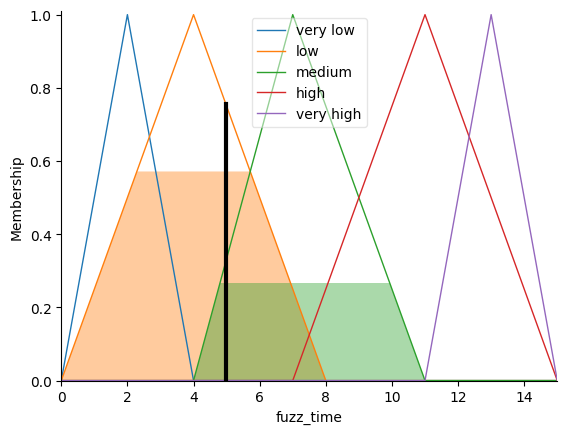

In [17]:
saturation = float(input("enter the saturation between [0-10] "))
dirtiness = float(input("enter the dirtiness between [0-30] "))
smartWashingMachine = SmartWashingMachine()
time_parameters = smartWashingMachine.compute_time_parameters(saturation, dirtiness)
print(time_parameters)

enter the saturation between [0-10] 6
enter the dirtiness between [0-30] 10
7.274815507743478


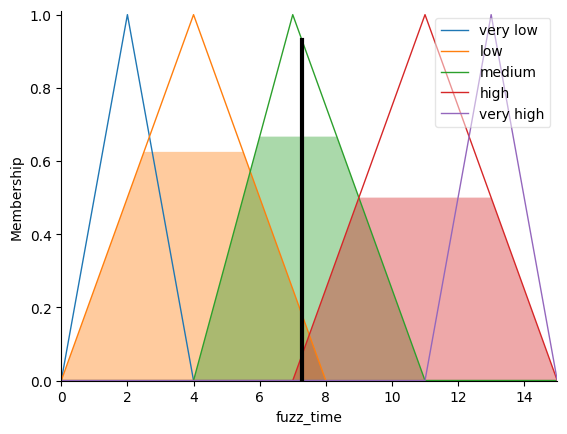

In [18]:
saturation = float(input("enter the saturation between [0-10] "))
dirtiness = float(input("enter the dirtiness between [0-30] "))
smartWashingMachine = SmartWashingMachine()
time_parameters = smartWashingMachine.compute_time_parameters(saturation, dirtiness)
print(time_parameters)

enter the saturation between [0-10] 6
enter the dirtiness between [0-30] 10
7.274815507743478


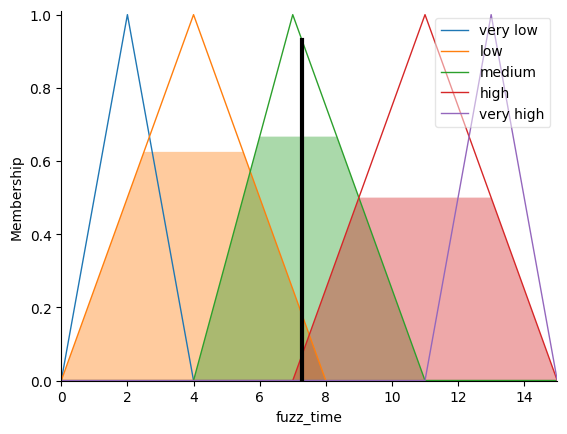

In [19]:
saturation = float(input("enter the saturation between [0-10] "))
dirtiness = float(input("enter the dirtiness between [0-30] "))
smartWashingMachine = SmartWashingMachine('Centroid')
time_parameters = smartWashingMachine.compute_time_parameters(saturation, dirtiness)
print(time_parameters)

enter the saturation between [0-10] 6
enter the dirtiness between [0-30] 10
7.098958333333334


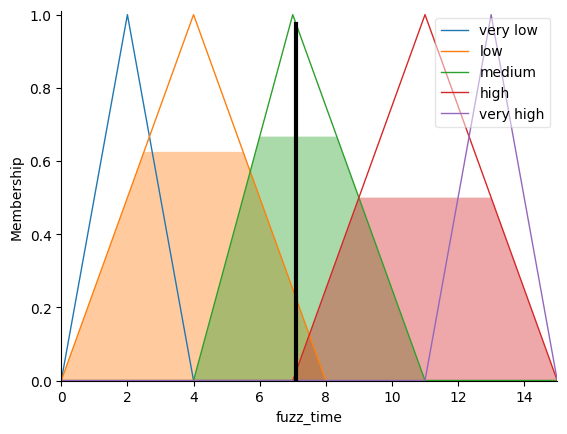

In [20]:
saturation = float(input("enter the saturation between [0-10] "))
dirtiness = float(input("enter the dirtiness between [0-30] "))
smartWashingMachine = SmartWashingMachine('Bisector')
time_parameters = smartWashingMachine.compute_time_parameters(saturation, dirtiness)
print(time_parameters)

enter the saturation between [0-10] 6
enter the dirtiness between [0-30] 10
6.0


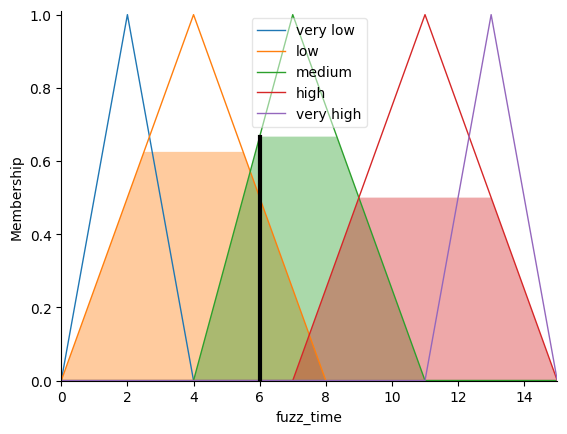

In [21]:
saturation = float(input("enter the saturation between [0-10] "))
dirtiness = float(input("enter the dirtiness between [0-30] "))
smartWashingMachine = SmartWashingMachine('SOM')
time_parameters = smartWashingMachine.compute_time_parameters(saturation, dirtiness)
print(time_parameters)

enter the saturation between [0-10] 6
enter the dirtiness between [0-30] 10
7.0


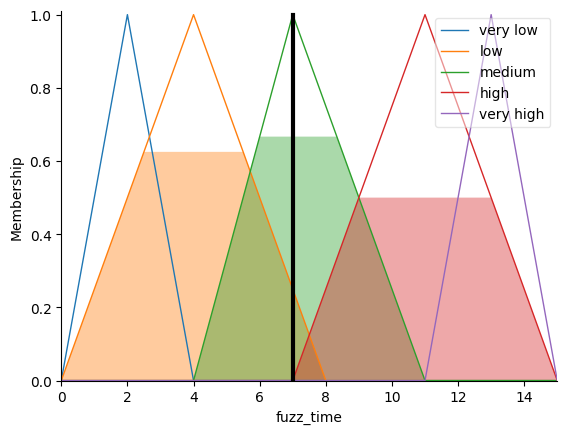

In [22]:
saturation = float(input("enter the saturation between [0-10] "))
dirtiness = float(input("enter the dirtiness between [0-30] "))
smartWashingMachine = SmartWashingMachine('MOM')
time_parameters = smartWashingMachine.compute_time_parameters(saturation, dirtiness)
print(time_parameters)

enter the saturation between [0-10] 6
enter the dirtiness between [0-30] 10
8.0


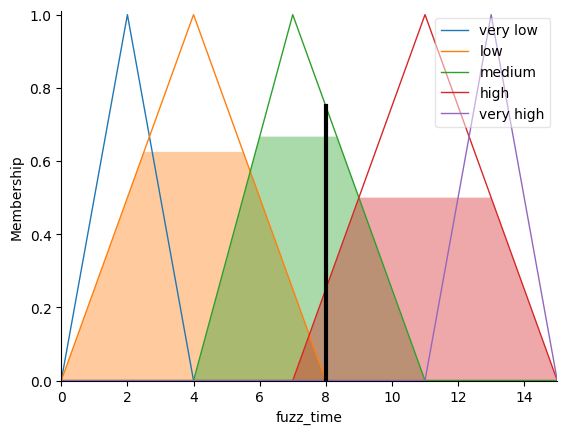

In [23]:
saturation = float(input("enter the saturation between [0-10] "))
dirtiness = float(input("enter the dirtiness between [0-30] "))
smartWashingMachine = SmartWashingMachine('LOM')
time_parameters = smartWashingMachine.compute_time_parameters(saturation, dirtiness)
print(time_parameters)